In [1]:
import sys 
sys.path.append('../scripts/')
from robot import *
from scipy.stats import multivariate_normal

In [2]:
class Particle: ###Particle5
    def __init__(self, init_pose):
        self.pose = init_pose
        
    def motion_update(self, nu, omega, time, noise_rate_pdf): #追加
        ns = noise_rate_pdf.rvs() #順にnn, no, on, oo
        pnu = nu + ns[0]*math.sqrt(abs(nu)/time) + ns[1]*math.sqrt(abs(omega)/time)
        pomega = omega + ns[2]*math.sqrt(abs(nu)/time) + ns[3]*math.sqrt(abs(omega)/time)
        self.pose = IdealRobot.state_transition(pnu, pomega, time, self.pose)

In [3]:
class Mcl: 
    def __init__(self, init_pose, num, motion_noise_stds): 
        self.particles = [Particle(init_pose) for i in range(num)]
        
        v = motion_noise_stds
        c = np.diag([v["nn"]**2, v["no"]**2, v["on"]**2, v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
    def motion_update(self, nu, omega, time): ###Mcl5###
        for p in self.particles: p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
        
    def draw(self, ax, elems): 
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles] 
        vys = [math.sin(p.pose[2]) for p in self.particles] 
        elems.append(ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.5))

In [4]:
class MclAgent(Agent):        ###MclAgent5
    def __init__(self, time_interval, nu, omega, particle_pose, particle_num=100,\
                motion_noise_stds={"nn":0.01, "no":0.02, "on":0.03, "oo":0.04}):
        super().__init__(nu, omega)
        self.mcl = Mcl(particle_pose, particle_num, motion_noise_stds)
        self.time_interval = time_interval
        
        self.prev_nu = 0.0       #追加
        self.prev_omega = 0.0 #追加
        
    def decision(self, observation=None): #追加
        self.mcl.motion_update(self.prev_nu, self.prev_omega, self.time_interval)
        self.prev_nu, self.prev_omega = self.nu, self.omega
        return self.nu, self.omega
        
    def draw(self, ax, elems):
        self.mcl.draw(ax, elems)

In [5]:
initial_pose = np.array([0, 0, 0]).T   ###mcl5_test（下の出力の先頭数行を記載）
a = MclAgent(0.1, 0.2, 10.0/180*math.pi, initial_pose)
a.mcl.motion_update(0.2, 10.0/180*math.pi, 0.1)
for p in a.mcl.particles:
    print(p.pose)

[0.02613668 0.00015611 0.01194582]
[0.02005743 0.00018527 0.01847391]
[0.02456667 0.00018215 0.01482887]
[0.0165482  0.00012686 0.0153317 ]
[0.02055198 0.00015626 0.0152056 ]
[0.01966913 0.00011875 0.01207416]
[0.01945125 0.00021004 0.02159558]
[0.02225681 0.00018401 0.01653479]
[1.85725301e-02 8.80386498e-05 9.48045205e-03]
[0.01711126 0.00031451 0.0367563 ]
[0.01741332 0.00010124 0.01162825]
[0.02550155 0.00018892 0.0148162 ]
[0.02231697 0.0001958  0.01754638]
[0.01814218 0.00018986 0.02092917]
[0.02435854 0.00012212 0.01002697]
[0.02243979 0.00017112 0.01525134]
[0.01492869 0.00015041 0.02015007]
[1.83899473e-02 9.00571632e-05 9.79409474e-03]
[0.01980525 0.00013851 0.01398734]
[0.02317814 0.00013886 0.01198147]
[0.01999179 0.00025642 0.02565097]
[0.0232511  0.00019002 0.01634504]
[2.14413815e-02 5.16386149e-05 4.81671528e-03]
[0.02317097 0.00011824 0.0102061 ]
[0.02162961 0.00010593 0.00979509]
[0.02795793 0.00020938 0.01497809]
[2.17032048e-02 9.71717940e-05 8.95454342e-03]
[1.4226

<IPython.core.display.Javascript object>


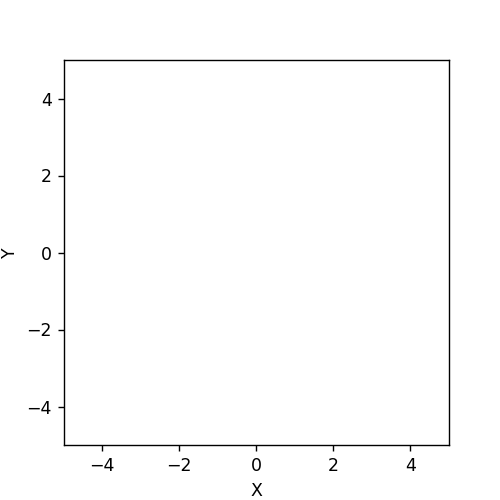

In [6]:
time_interval = 0.1  ###draw_mcl5###
world = World(30, time_interval) 

circling = MclAgent(time_interval, 0.2, 10.0/180*math.pi, np.array([0, 0, 0]).T)
r = Robot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="red" )
world.append(r)

world.draw()

<IPython.core.display.Javascript object>


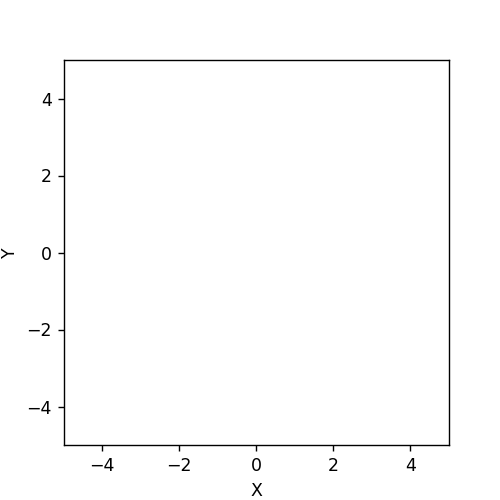

In [7]:
time_interval = 0.1  ###mcl5small###
world = World(30, time_interval) 

circling = MclAgent(time_interval, 0.2, 10.0/180*math.pi, np.array([0, 0, 0]).T, motion_noise_stds={"nn":0.1, "no":0.2, "on":0.3, "oo":0.1})
r = Robot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="red" )
world.append(r)

world.draw()

<IPython.core.display.Javascript object>


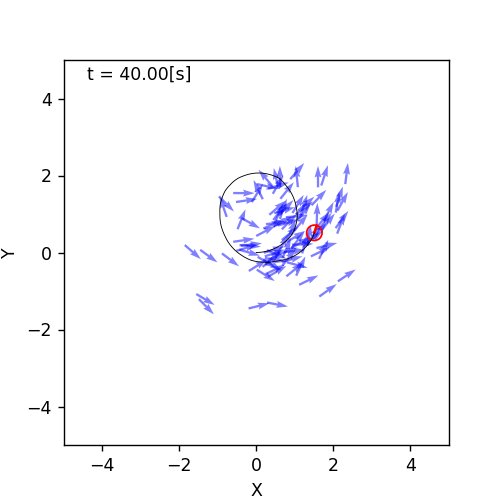

In [8]:
time_interval = 0.1  ###mcl5small###
world = World(40, time_interval) 

circling = MclAgent(time_interval, 0.2, 10.0/180*math.pi, np.array([0, 0, 0]).T, motion_noise_stds={"nn":0.19, "no":0.00001, "on":0.13, "oo":0.2})
r = Robot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="red")
world.append(r)

world.draw()